In [1]:
import numpy as np 
import pandas as pd 
import os

import csv as csv
import sklearn as scl

%matplotlib inline
import matplotlib.pyplot as plt

# Exploratory Data Analysis

In [2]:
train = pd.read_csv('data/train.csv') 
train.shape

(891, 12)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test = pd.read_csv('data/test.csv') 
test.shape

(418, 11)

In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
features = list(set(test.columns) - {'Name', 'PassengerId'})
features

['Ticket',
 'Age',
 'Sex',
 'SibSp',
 'Fare',
 'Cabin',
 'Pclass',
 'Parch',
 'Embarked']

In [8]:
nonnumeric = ['Sex', 'Cabin', 'Embarked', 'Ticket']

In [9]:
# Impute missing values using the median for numeric columns and the most common value for string columns.
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [10]:
# Join the features from train and test together before imputing missing values,
# in case their distribution is slightly different
from sklearn.preprocessing import LabelEncoder

common = train[features].append(test[features])
common = DataFrameImputer().fit_transform(common)

In [11]:
# Change categorical features  to columns of integer values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in nonnumeric:
    common[feature] = le.fit_transform(common[feature])
    
common.head()

,Ticket,Age,Sex,SibSp,Fare,Cabin,Pclass,Parch,Embarked
0,720,22.0,1,1,7.2500,80,3,0,2
1,816,38.0,0,1,71.2833,106,1,0,0
2,914,26.0,0,0,7.9250,80,3,0,2
3,65,35.0,0,1,53.1000,70,1,0,2
4,649,35.0,1,0,8.0500,80,3,0,2


In [12]:
train2 = common[0:train.shape[0]]
test2 = common[train.shape[0]::]
train2.head()

,Ticket,Age,Sex,SibSp,Fare,Cabin,Pclass,Parch,Embarked
0,720,22.0,1,1,7.2500,80,3,0,2
1,816,38.0,0,1,71.2833,106,1,0,0
2,914,26.0,0,0,7.9250,80,3,0,2
3,65,35.0,0,1,53.1000,70,1,0,2
4,649,35.0,1,0,8.0500,80,3,0,2


In [13]:
correlation_matrix = train2.corr()
correlation_matrix

,Cabin,Embarked,SibSp,Fare,Ticket,Parch,Sex,Age,Pclass
Cabin,1.000000,0.071185,0.005494,-0.040065,-0.004401,0.014164,-0.074228,-0.004563,-0.062211
Embarked,0.071185,1.000000,0.068230,-0.224719,0.000032,0.039798,0.108262,-0.018754,0.162098
SibSp,0.005494,0.068230,1.000000,0.159651,0.079191,0.414838,-0.114631,-0.233296,0.083081
Fare,-0.040065,-0.224719,0.159651,1.000000,-0.015503,0.216225,-0.182333,0.096688,-0.549500
Ticket,-0.004401,0.000032,0.079191,-0.015503,1.000000,0.019936,0.060416,-0.070302,0.322475
Parch,0.014164,0.039798,0.414838,0.216225,0.019936,1.000000,-0.245489,-0.172482,0.018443
Sex,-0.074228,0.108262,-0.114631,-0.182333,0.060416,-0.245489,1.000000,0.081163,0.131900
Age,-0.004563,-0.018754,-0.233296,0.096688,-0.070302,-0.172482,0.081163,1.000000,-0.339898
Pclass,-0.062211,0.162098,0.083081,-0.549500,0.322475,0.018443,0.131900,-0.339898,1.000000


In [14]:
import seaborn as sns

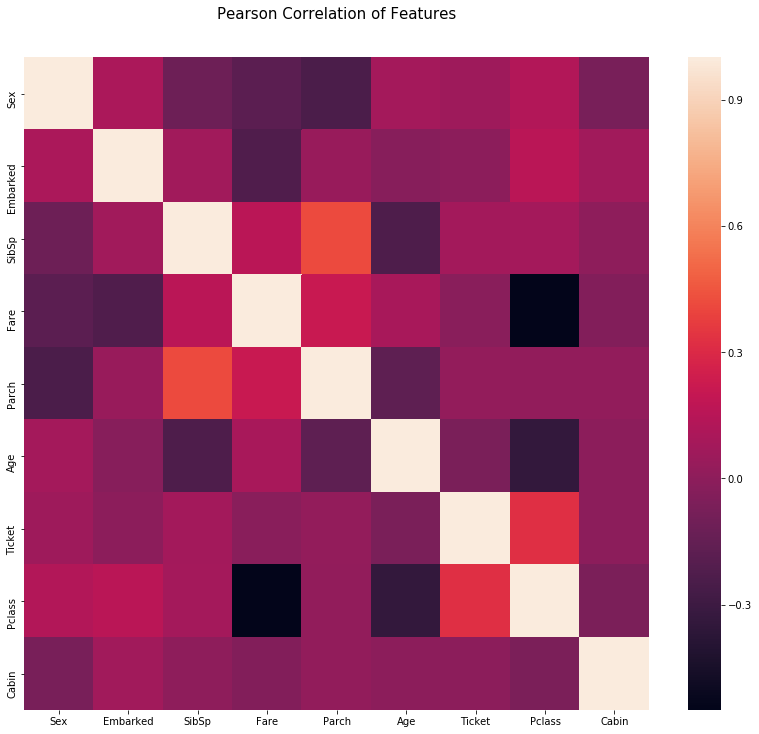

In [15]:
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix)

In [16]:
features2 = ['Sex','Age','Pclass','Parch','Embarked', 'Cabin']
train3 = train2[features2]
test3 = test2[features2]
correlation_matrix2 = train3.corr()
correlation_matrix2

,Sex,Age,Pclass,Parch,Embarked,Cabin
Sex,1.000000,0.081163,0.131900,-0.245489,0.108262,-0.074228
Age,0.081163,1.000000,-0.339898,-0.172482,-0.018754,-0.004563
Pclass,0.131900,-0.339898,1.000000,0.018443,0.162098,-0.062211
Parch,-0.245489,-0.172482,0.018443,1.000000,0.039798,0.014164
Embarked,0.108262,-0.018754,0.162098,0.039798,1.000000,0.071185
Cabin,-0.074228,-0.004563,-0.062211,0.014164,0.071185,1.000000


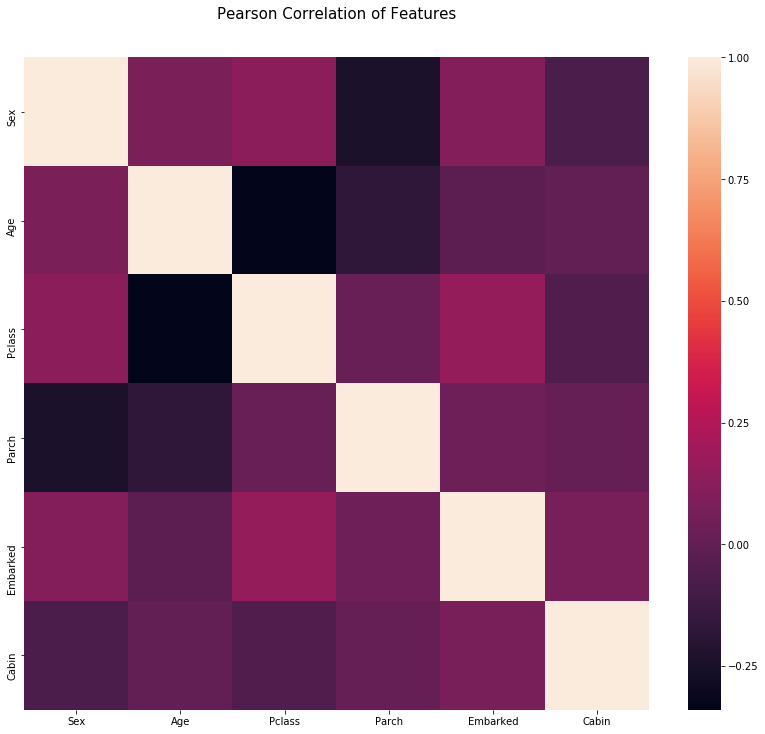

In [17]:
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix2)

In [18]:
train_X = train3.values
test_X = test3.values
train_y = train['Survived']

# Split dataset

In [19]:
from sklearn.utils import shuffle

df_train = train3.join(pd.DataFrame({'Survived': train_y}))
size = int(df_train.shape[0] * 0.8)
print(size)
train4 = shuffle(df_train)
train_80 = train4[:size]
train_20 = train4[size:]

712


In [20]:
cv_train_X = train_80[features2].values
cv_test_X = train_20[features2].values
cv_train_y = train_80['Survived']
cv_test_y = train_20['Survived']

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_X, train_y)
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [22]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(train_X)
accuracy_score(train_y, y_pred)

0.8024691358024691

In [23]:
# Cross-validation
model2 = LogisticRegression()
model2.fit(cv_train_X, cv_train_y)
y_pred = model2.predict(cv_test_X)
accuracy_score(cv_test_y, y_pred)

0.8212290502793296

In [24]:
# Make predictions
preds = model.predict(test_X)

In [25]:
submission = pd.DataFrame({ 'PassengerId': test['PassengerId'],
                            'Survived': preds })
submission.to_csv('submission.csv', index=False)

# XGBoost

In [26]:
import xgboost as xgb

gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(train_X, train_y)

In [27]:
y_pred = gbm.predict(train_X)
accuracy_score(train_y, y_pred)

/Users/leyla/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8720538720538721

In [28]:
# Cross-validation
gbm2 = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(cv_train_X, cv_train_y)
y_pred = gbm2.predict(cv_test_X)
accuracy_score(cv_test_y, y_pred)

/Users/leyla/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8491620111731844

In [29]:
preds2 = gbm.predict(test_X)

/Users/leyla/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [30]:
submission2 = pd.DataFrame({ 'PassengerId': test['PassengerId'],
                             'Survived': preds2 })
submission2.to_csv('submission_.csv', index=False)

## Tips

If you want to drive up your score try to play with XGBoost parameters / features, try to use CatBoost

## Grid Search

In [31]:
# is used all features

train_X = train2.values
test_X = test2.values
train_y = train['Survived']

In [32]:
import warnings

warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

In [33]:
from sklearn import model_selection
import xgboost as xgb

# XGBoost - sklearn method
gbm = xgb.XGBClassifier()

xgb_params = {
'learning_rate': [0.005, 0.01, 0.015],
'n_estimators': [300],
'max_depth': [9, 10, 12, 15, 20],
'gamma': [0, 0.01, 0.05],
'subsample': [0.6, 0.7, 0.8],
'colsample_bytree': [0.6, 0.7, 0.8]
}

grid = model_selection.GridSearchCV(gbm, xgb_params, cv=5)
grid.fit(train_X,train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.005, 0.01, 0.015], 'n_estimators': [300], 'max_depth': [9, 10, 12, 15, 20], 'gamma': [0, 0.01, 0.05], 'subsample': [0.6, 0.7, 0.8], 'colsample_bytree': [0.6, 0.7, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.8f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

0.82379349 (+/-0.084) for {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.6}
0.83052750 (+/-0.071) for {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.7}
0.83052750 (+/-0.061) for {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.8}
0.82379349 (+/-0.077) for {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.6}
0.83052750 (+/-0.070) for {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.7}
0.83164983 (+/-0.063) for {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.8}
0.82491582 (+/-0.079) for {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 12, 'n_estimators': 300, 'subsample': 

In [35]:
print('Best Params:')
print(grid.best_params_)
print('Best CV Score:')
print(grid.best_score_)

Best Params:
{'colsample_bytree': 0.7, 'gamma': 0.05, 'learning_rate': 0.015, 'max_depth': 12, 'n_estimators': 300, 'subsample': 0.7}
Best CV Score:
0.8518518518518519


In [36]:
gbm2 = xgb.XGBClassifier(colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=15, n_estimators=300, subsample=0.7).fit(train_X, train_y)

preds = gbm2.predict(test_X)

In [37]:
submission2 = pd.DataFrame({ 'PassengerId': test['PassengerId'],
                             'Survived': preds2 })
submission2.to_csv('submission_2.csv', index=False)

## CatBoost

In [38]:
from catboost import CatBoostClassifier

In [ ]:
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]

fe = column_index(train2, ['Ticket', 'Sex', 'SibSp', 'Cabin', 'Pclass', 'Parch', 'Embarked'])

In [48]:
model = CatBoostClassifier(iterations=100, learning_rate=0.07, depth=16, loss_function='Logloss')

In [49]:
model.fit(train_X, train_y, fe)

0:	learn: 0.6570468	total: 70.8ms	remaining: 35.3s
1:	learn: 0.6262480	total: 80.3ms	remaining: 20s
2:	learn: 0.5983369	total: 91.2ms	remaining: 15.1s
3:	learn: 0.5735452	total: 111ms	remaining: 13.7s
4:	learn: 0.5599538	total: 119ms	remaining: 11.8s
5:	learn: 0.5407836	total: 134ms	remaining: 11.1s
6:	learn: 0.5273169	total: 150ms	remaining: 10.6s
7:	learn: 0.5220339	total: 161ms	remaining: 9.88s
8:	learn: 0.5072500	total: 192ms	remaining: 10.5s
9:	learn: 0.5001981	total: 200ms	remaining: 9.79s
10:	learn: 0.4851755	total: 241ms	remaining: 10.7s
11:	learn: 0.4807826	total: 250ms	remaining: 10.1s
12:	learn: 0.4677350	total: 267ms	remaining: 9.99s
13:	learn: 0.4591082	total: 290ms	remaining: 10.1s
14:	learn: 0.4544872	total: 314ms	remaining: 10.2s
15:	learn: 0.4453588	total: 469ms	remaining: 14.2s
16:	learn: 0.4421652	total: 477ms	remaining: 13.6s
17:	learn: 0.4404184	total: 486ms	remaining: 13s
18:	learn: 0.4364107	total: 500ms	remaining: 12.7s
19:	learn: 0.4323866	total: 537ms	remainin


Iteration with suspicious time 9.09 sec ignored in overall statistics.


109:	learn: 0.3412003	total: 3.27s	remaining: 11.7s
110:	learn: 0.3392380	total: 3.39s	remaining: 12s
111:	learn: 0.3391651	total: 3.4s	remaining: 11.9s
112:	learn: 0.3390035	total: 3.41s	remaining: 11.8s
113:	learn: 0.3380419	total: 3.46s	remaining: 11.8s
114:	learn: 0.3371662	total: 3.52s	remaining: 11.9s
115:	learn: 0.3365627	total: 3.58s	remaining: 11.9s
116:	learn: 0.3362139	total: 3.65s	remaining: 12.1s
117:	learn: 0.3354388	total: 3.71s	remaining: 12.1s
118:	learn: 0.3349970	total: 3.76s	remaining: 12.2s
119:	learn: 0.3349662	total: 3.77s	remaining: 12s
120:	learn: 0.3344388	total: 3.78s	remaining: 11.9s
121:	learn: 0.3344254	total: 3.79s	remaining: 11.9s
122:	learn: 0.3343360	total: 3.81s	remaining: 11.8s
123:	learn: 0.3333720	total: 3.86s	remaining: 11.8s
124:	learn: 0.3325433	total: 3.95s	remaining: 11.9s
125:	learn: 0.3321697	total: 3.96s	remaining: 11.9s
126:	learn: 0.3316349	total: 3.99s	remaining: 11.8s
127:	learn: 0.3314616	total: 4s	remaining: 11.7s
128:	learn: 0.331453


Iteration with suspicious time 11.8 sec ignored in overall statistics.


133:	learn: 0.3287957	total: 4.2s	remaining: 11.7s
134:	learn: 0.3287692	total: 4.22s	remaining: 11.6s
135:	learn: 0.3284241	total: 4.3s	remaining: 11.7s



Iteration with suspicious time 23.6 sec ignored in overall statistics.


136:	learn: 0.3260768	total: 4.3s	remaining: 11.7s
137:	learn: 0.3259392	total: 4.34s	remaining: 11.6s



Iteration with suspicious time 6.99 sec ignored in overall statistics.


138:	learn: 0.3233901	total: 4.34s	remaining: 11.6s



Iteration with suspicious time 23 sec ignored in overall statistics.


139:	learn: 0.3217556	total: 4.34s	remaining: 11.6s
140:	learn: 0.3215671	total: 4.37s	remaining: 11.5s
141:	learn: 0.3214974	total: 4.39s	remaining: 11.5s
142:	learn: 0.3209457	total: 5.56s	remaining: 14.4s



Iteration with suspicious time 21.9 sec ignored in overall statistics.


143:	learn: 0.3175149	total: 5.56s	remaining: 14.4s
144:	learn: 0.3167212	total: 5.64s	remaining: 14.4s
145:	learn: 0.3165032	total: 5.69s	remaining: 14.4s



Iteration with suspicious time 21.2 sec ignored in overall statistics.


146:	learn: 0.3136256	total: 5.69s	remaining: 14.4s
147:	learn: 0.3132349	total: 5.91s	remaining: 14.8s



Iteration with suspicious time 21.1 sec ignored in overall statistics.


148:	learn: 0.3118841	total: 5.91s	remaining: 14.8s



Iteration with suspicious time 18.9 sec ignored in overall statistics.


149:	learn: 0.3112571	total: 5.91s	remaining: 14.8s



Iteration with suspicious time 23.3 sec ignored in overall statistics.


150:	learn: 0.3090581	total: 5.91s	remaining: 14.8s
151:	learn: 0.3088631	total: 8.99s	remaining: 22s



Iteration with suspicious time 21.5 sec ignored in overall statistics.


152:	learn: 0.3081372	total: 8.99s	remaining: 22s



Iteration with suspicious time 24.7 sec ignored in overall statistics.


153:	learn: 0.3077925	total: 8.99s	remaining: 22s



Iteration with suspicious time 22.7 sec ignored in overall statistics.


154:	learn: 0.3070272	total: 8.99s	remaining: 22s
155:	learn: 0.3069676	total: 9.01s	remaining: 21.7s
156:	learn: 0.3069439	total: 9.02s	remaining: 21.5s
157:	learn: 0.3068991	total: 9.03s	remaining: 21.3s



Iteration with suspicious time 42.7 sec ignored in overall statistics.


158:	learn: 0.3051722	total: 9.03s	remaining: 21.3s



Iteration with suspicious time 23.6 sec ignored in overall statistics.


159:	learn: 0.3046378	total: 9.03s	remaining: 21.3s



Iteration with suspicious time 7.75 sec ignored in overall statistics.


160:	learn: 0.3045542	total: 9.03s	remaining: 21.3s



Iteration with suspicious time 24.4 sec ignored in overall statistics.


161:	learn: 0.3037880	total: 9.03s	remaining: 21.3s
162:	learn: 0.3037832	total: 9.04s	remaining: 20.9s
163:	learn: 0.3037684	total: 9.05s	remaining: 20.7s
164:	learn: 0.3037642	total: 9.05s	remaining: 20.5s



Iteration with suspicious time 26 sec ignored in overall statistics.


165:	learn: 0.3016004	total: 9.05s	remaining: 20.5s



Iteration with suspicious time 24.4 sec ignored in overall statistics.


166:	learn: 0.2999771	total: 9.05s	remaining: 20.5s



Iteration with suspicious time 31.4 sec ignored in overall statistics.


167:	learn: 0.2986219	total: 9.05s	remaining: 20.5s



Iteration with suspicious time 23.8 sec ignored in overall statistics.


168:	learn: 0.2979641	total: 9.05s	remaining: 20.5s



Iteration with suspicious time 20.5 sec ignored in overall statistics.


169:	learn: 0.2967347	total: 9.05s	remaining: 20.5s



Iteration with suspicious time 22.8 sec ignored in overall statistics.


170:	learn: 0.2964359	total: 9.05s	remaining: 20.5s



Iteration with suspicious time 24.8 sec ignored in overall statistics.


171:	learn: 0.2942683	total: 9.05s	remaining: 20.5s



Iteration with suspicious time 28 sec ignored in overall statistics.


172:	learn: 0.2931072	total: 9.05s	remaining: 20.5s



Iteration with suspicious time 20.1 sec ignored in overall statistics.


173:	learn: 0.2914917	total: 9.05s	remaining: 20.5s



Iteration with suspicious time 22.1 sec ignored in overall statistics.


174:	learn: 0.2911515	total: 9.05s	remaining: 20.5s



Iteration with suspicious time 20.8 sec ignored in overall statistics.


175:	learn: 0.2901513	total: 9.05s	remaining: 20.5s



Iteration with suspicious time 20.3 sec ignored in overall statistics.


176:	learn: 0.2855900	total: 9.05s	remaining: 20.5s



Iteration with suspicious time 19.1 sec ignored in overall statistics.


177:	learn: 0.2839178	total: 9.05s	remaining: 20.5s



Iteration with suspicious time 20 sec ignored in overall statistics.


178:	learn: 0.2823093	total: 9.05s	remaining: 20.5s



Iteration with suspicious time 22.9 sec ignored in overall statistics.


179:	learn: 0.2819029	total: 9.05s	remaining: 20.5s



Iteration with suspicious time 21.5 sec ignored in overall statistics.


180:	learn: 0.2799685	total: 9.05s	remaining: 20.5s



Iteration with suspicious time 23.5 sec ignored in overall statistics.


181:	learn: 0.2793702	total: 9.05s	remaining: 20.5s



Iteration with suspicious time 21.3 sec ignored in overall statistics.


182:	learn: 0.2778291	total: 9.05s	remaining: 20.5s



Iteration with suspicious time 26.3 sec ignored in overall statistics.


183:	learn: 0.2769077	total: 9.05s	remaining: 20.5s
184:	learn: 0.2749969	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 24.6 sec ignored in overall statistics.


185:	learn: 0.2747582	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 22.9 sec ignored in overall statistics.


186:	learn: 0.2745685	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 20.7 sec ignored in overall statistics.


187:	learn: 0.2739624	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 20.3 sec ignored in overall statistics.


188:	learn: 0.2720108	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 22.1 sec ignored in overall statistics.


189:	learn: 0.2715384	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 24.1 sec ignored in overall statistics.


190:	learn: 0.2700882	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 22.1 sec ignored in overall statistics.


191:	learn: 0.2682833	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 21.2 sec ignored in overall statistics.


192:	learn: 0.2669728	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 21.8 sec ignored in overall statistics.


193:	learn: 0.2659726	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 21 sec ignored in overall statistics.


194:	learn: 0.2640691	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 19.4 sec ignored in overall statistics.


195:	learn: 0.2638819	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 19.1 sec ignored in overall statistics.


196:	learn: 0.2632822	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 22.1 sec ignored in overall statistics.


197:	learn: 0.2603507	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 23.7 sec ignored in overall statistics.


198:	learn: 0.2594828	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 24.4 sec ignored in overall statistics.


199:	learn: 0.2583217	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 9.87 sec ignored in overall statistics.


200:	learn: 0.2580823	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 25.6 sec ignored in overall statistics.


201:	learn: 0.2570642	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 24.7 sec ignored in overall statistics.


202:	learn: 0.2565971	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 14.3 sec ignored in overall statistics.


203:	learn: 0.2541920	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 19.3 sec ignored in overall statistics.


204:	learn: 0.2536071	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 20.8 sec ignored in overall statistics.


205:	learn: 0.2530728	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 23.5 sec ignored in overall statistics.


206:	learn: 0.2522738	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 19.1 sec ignored in overall statistics.


207:	learn: 0.2501434	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 21 sec ignored in overall statistics.


208:	learn: 0.2491017	total: 13.2s	remaining: 27.8s



Iteration with suspicious time 25.9 sec ignored in overall statistics.


209:	learn: 0.2478953	total: 13.2s	remaining: 27.8s
210:	learn: 0.2478789	total: 13.2s	remaining: 25.5s



Iteration with suspicious time 27.4 sec ignored in overall statistics.


211:	learn: 0.2450888	total: 13.2s	remaining: 25.5s
212:	learn: 0.2449729	total: 13.4s	remaining: 25.4s



Iteration with suspicious time 21.8 sec ignored in overall statistics.


213:	learn: 0.2441043	total: 13.4s	remaining: 25.4s
214:	learn: 0.2440844	total: 13.4s	remaining: 25.1s



Iteration with suspicious time 22.8 sec ignored in overall statistics.


215:	learn: 0.2437569	total: 13.4s	remaining: 25.1s



Iteration with suspicious time 24 sec ignored in overall statistics.


216:	learn: 0.2429125	total: 13.4s	remaining: 25.1s



Iteration with suspicious time 23.9 sec ignored in overall statistics.


217:	learn: 0.2423760	total: 13.4s	remaining: 25.1s



Iteration with suspicious time 25.6 sec ignored in overall statistics.


218:	learn: 0.2421206	total: 13.4s	remaining: 25.1s



Iteration with suspicious time 27.2 sec ignored in overall statistics.


219:	learn: 0.2416165	total: 13.4s	remaining: 25.1s



Iteration with suspicious time 26.2 sec ignored in overall statistics.


220:	learn: 0.2415512	total: 13.4s	remaining: 25.1s



Iteration with suspicious time 25.8 sec ignored in overall statistics.


221:	learn: 0.2408137	total: 13.4s	remaining: 25.1s



Iteration with suspicious time 22.9 sec ignored in overall statistics.


222:	learn: 0.2404945	total: 13.4s	remaining: 25.1s



Iteration with suspicious time 22.6 sec ignored in overall statistics.


223:	learn: 0.2401611	total: 13.4s	remaining: 25.1s



Iteration with suspicious time 25.4 sec ignored in overall statistics.


224:	learn: 0.2395067	total: 13.4s	remaining: 25.1s



Iteration with suspicious time 22 sec ignored in overall statistics.


225:	learn: 0.2383750	total: 13.4s	remaining: 25.1s



Iteration with suspicious time 18.5 sec ignored in overall statistics.


226:	learn: 0.2380279	total: 13.4s	remaining: 25.1s



Iteration with suspicious time 23.6 sec ignored in overall statistics.


227:	learn: 0.2376731	total: 13.4s	remaining: 25.1s



Iteration with suspicious time 19.2 sec ignored in overall statistics.


228:	learn: 0.2372061	total: 13.4s	remaining: 25.1s



Iteration with suspicious time 19 sec ignored in overall statistics.


229:	learn: 0.2367944	total: 13.4s	remaining: 25.1s
230:	learn: 0.2366326	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 21 sec ignored in overall statistics.


231:	learn: 0.2358544	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 22.1 sec ignored in overall statistics.


232:	learn: 0.2356952	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 21.8 sec ignored in overall statistics.


233:	learn: 0.2347502	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 16.7 sec ignored in overall statistics.


234:	learn: 0.2344981	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 20.1 sec ignored in overall statistics.


235:	learn: 0.2343667	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 21 sec ignored in overall statistics.


236:	learn: 0.2342956	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 25.5 sec ignored in overall statistics.


237:	learn: 0.2334144	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 23.1 sec ignored in overall statistics.


238:	learn: 0.2325642	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 24.3 sec ignored in overall statistics.


239:	learn: 0.2315792	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 26.9 sec ignored in overall statistics.


240:	learn: 0.2314665	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 25.7 sec ignored in overall statistics.


241:	learn: 0.2311161	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 26.6 sec ignored in overall statistics.


242:	learn: 0.2295413	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 24.6 sec ignored in overall statistics.


243:	learn: 0.2291732	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 23.5 sec ignored in overall statistics.


244:	learn: 0.2280980	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 25.9 sec ignored in overall statistics.


245:	learn: 0.2268800	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 26.2 sec ignored in overall statistics.


246:	learn: 0.2261084	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 19.5 sec ignored in overall statistics.


247:	learn: 0.2251676	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 20.5 sec ignored in overall statistics.


248:	learn: 0.2247502	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 21.2 sec ignored in overall statistics.


249:	learn: 0.2238740	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 20.1 sec ignored in overall statistics.


250:	learn: 0.2224755	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 18.8 sec ignored in overall statistics.


251:	learn: 0.2219156	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 21.7 sec ignored in overall statistics.


252:	learn: 0.2202554	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 24.2 sec ignored in overall statistics.


253:	learn: 0.2195789	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 23.7 sec ignored in overall statistics.


254:	learn: 0.2193029	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 23.7 sec ignored in overall statistics.


255:	learn: 0.2192310	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 26.5 sec ignored in overall statistics.


256:	learn: 0.2187902	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 21.9 sec ignored in overall statistics.


257:	learn: 0.2181149	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 27.7 sec ignored in overall statistics.


258:	learn: 0.2171086	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 24.7 sec ignored in overall statistics.


259:	learn: 0.2169887	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 22.3 sec ignored in overall statistics.


260:	learn: 0.2166169	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 25.5 sec ignored in overall statistics.


261:	learn: 0.2162045	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 25.6 sec ignored in overall statistics.


262:	learn: 0.2158717	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 23.9 sec ignored in overall statistics.


263:	learn: 0.2153287	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 23.3 sec ignored in overall statistics.


264:	learn: 0.2146399	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 20.8 sec ignored in overall statistics.


265:	learn: 0.2139553	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 26.3 sec ignored in overall statistics.


266:	learn: 0.2129864	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 25.3 sec ignored in overall statistics.


267:	learn: 0.2114144	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 23.8 sec ignored in overall statistics.


268:	learn: 0.2111379	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 21.4 sec ignored in overall statistics.


269:	learn: 0.2108554	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 22.1 sec ignored in overall statistics.


270:	learn: 0.2098088	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 25 sec ignored in overall statistics.


271:	learn: 0.2097542	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 20.9 sec ignored in overall statistics.


272:	learn: 0.2089427	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 18.5 sec ignored in overall statistics.


273:	learn: 0.2085822	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 20.5 sec ignored in overall statistics.


274:	learn: 0.2082597	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 19 sec ignored in overall statistics.


275:	learn: 0.2081107	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 18.9 sec ignored in overall statistics.


276:	learn: 0.2077066	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 19.3 sec ignored in overall statistics.


277:	learn: 0.2072601	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 19.7 sec ignored in overall statistics.


278:	learn: 0.2067359	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 21.4 sec ignored in overall statistics.


279:	learn: 0.2064462	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 18.4 sec ignored in overall statistics.


280:	learn: 0.2062530	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 19.5 sec ignored in overall statistics.


281:	learn: 0.2059609	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 20 sec ignored in overall statistics.


282:	learn: 0.2057338	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 19.4 sec ignored in overall statistics.


283:	learn: 0.2053485	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 20.3 sec ignored in overall statistics.


284:	learn: 0.2051883	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 19.5 sec ignored in overall statistics.


285:	learn: 0.2050896	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 19.8 sec ignored in overall statistics.


286:	learn: 0.2040716	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 19 sec ignored in overall statistics.


287:	learn: 0.2033916	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 19.7 sec ignored in overall statistics.


288:	learn: 0.2031936	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 26.1 sec ignored in overall statistics.


289:	learn: 0.2030640	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 19.4 sec ignored in overall statistics.


290:	learn: 0.2023338	total: 16.2s	remaining: 28.5s



Iteration with suspicious time 19.8 sec ignored in overall statistics.


291:	learn: 0.2020181	total: 16.2s	remaining: 28.5s
292:	learn: 0.2019478	total: 22.9s	remaining: 30.8s



Iteration with suspicious time 20.9 sec ignored in overall statistics.


293:	learn: 0.2016416	total: 22.9s	remaining: 30.8s



Iteration with suspicious time 18.5 sec ignored in overall statistics.


294:	learn: 0.2007402	total: 22.9s	remaining: 30.8s



Iteration with suspicious time 19.8 sec ignored in overall statistics.


295:	learn: 0.1988981	total: 22.9s	remaining: 30.8s



Iteration with suspicious time 19.3 sec ignored in overall statistics.


296:	learn: 0.1985865	total: 22.9s	remaining: 30.8s
297:	learn: 0.1984474	total: 37.4s	remaining: 48.7s
298:	learn: 0.1979445	total: 56.7s	remaining: 1m 13s
299:	learn: 0.1975510	total: 1m 18s	remaining: 1m 39s
300:	learn: 0.1965356	total: 1m 37s	remaining: 2m 2s
301:	learn: 0.1963494	total: 1m 57s	remaining: 2m 26s
302:	learn: 0.1962290	total: 2m 22s	remaining: 2m 55s
303:	learn: 0.1958864	total: 2m 47s	remaining: 3m 23s
304:	learn: 0.1951908	total: 3m 10s	remaining: 3m 48s
305:	learn: 0.1950470	total: 3m 34s	remaining: 4m 14s
306:	learn: 0.1943716	total: 3m 56s	remaining: 4m 38s
307:	learn: 0.1937437	total: 4m 17s	remaining: 4m 59s
308:	learn: 0.1935201	total: 4m 40s	remaining: 5m 22s
309:	learn: 0.1929686	total: 5m 5s	remaining: 5m 47s
310:	learn: 0.1910707	total: 5m 28s	remaining: 6m 9s
311:	learn: 0.1898265	total: 5m 50s	remaining: 6m 29s
312:	learn: 0.1878621	total: 5m 57s	remaining: 6m 33s
313:	learn: 0.1870810	total: 6m 18s	remaining: 6m 51s
314:	learn: 0.1862463	total: 6m 41s	

In [56]:
preds = model.predict(test_X)
preds = preds.astype(int)

In [57]:
submission = pd.DataFrame({ 'PassengerId': test['PassengerId'],
                             'Survived': preds })
submission.to_csv('submission2.csv', index=False)

## Tip

Try GridSearch for CatBoost